In [12]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [13]:
#On les récupère en fichier npz :

def load_embeddings_npz(npz_path):
    npz_data = np.load(npz_path)
    return {key: npz_data[key] for key in npz_data.files}

embeddings_original = load_embeddings_npz('/content/cyanobact.original.long.prots.npz')
embeddings_shuffle = load_embeddings_npz('/content/cyanobact.long.prots.shuffled.npz')
array_embeddings_original=np.array(embeddings_original['embeddings'])
array_embeddings_shuffle=np.array(embeddings_shuffle['embeddings'])


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


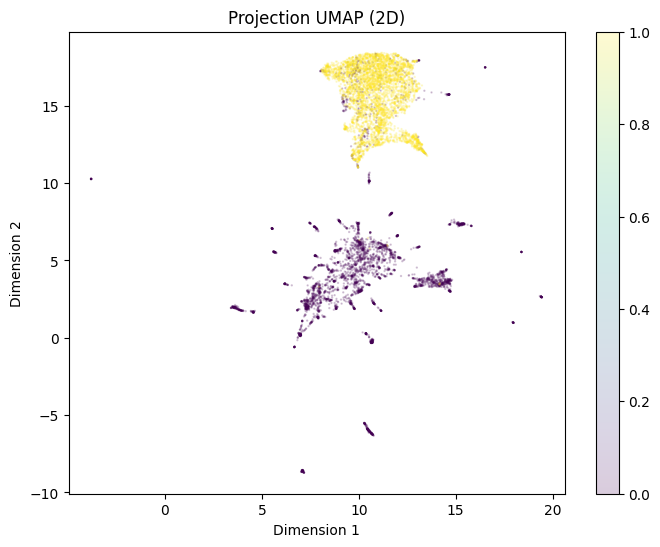

In [66]:
# Charger le jeu de données exemple
data_reel=array_embeddings_original

data_shuffle=array_embeddings_shuffle


#  label arrays
y_reel = np.array([0] * len(data_reel))
y_shuffle = np.array([1] * len(data_shuffle))

# concatenation
X = np.vstack([data_reel, data_shuffle])
y = np.concatenate([y_reel, y_shuffle])

# Standardisation
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y, alpha=0.2, s=0.5)
plt.colorbar()
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


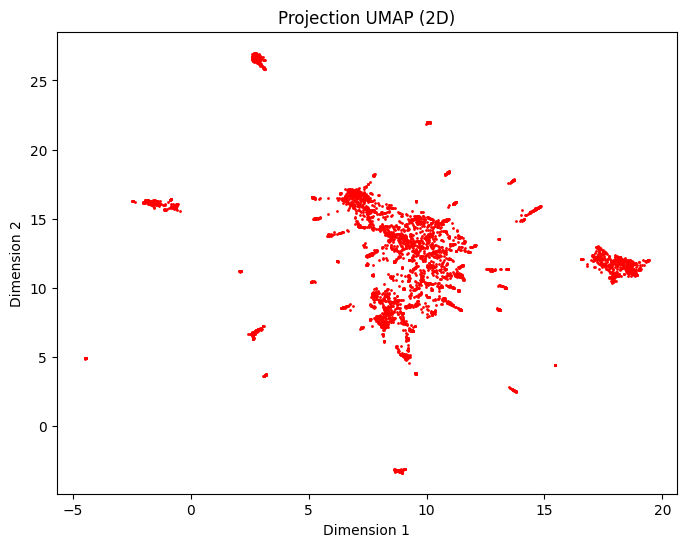

In [67]:
# Charger le jeu de données
data_reel=array_embeddings_original

X = data_reel # Données d'entrée : vecteurs

# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c="red", s=1)
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

13727


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


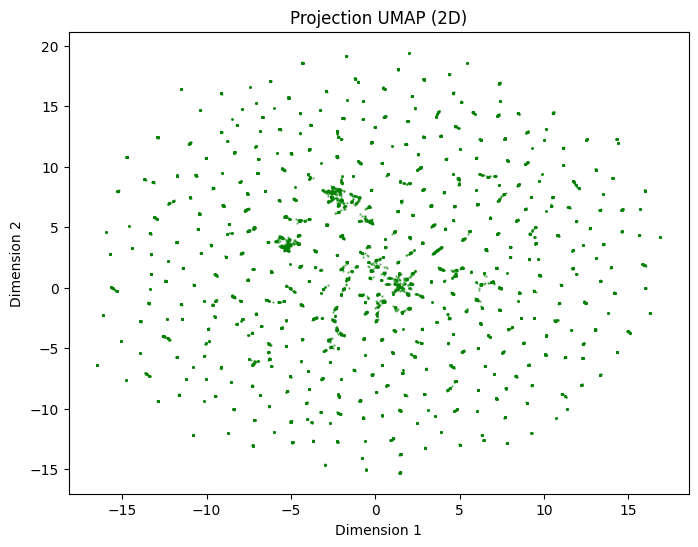

In [68]:
#Cyanobactéries issues de SwissProt
# Charger le jeu de données
embeddings_swissprot = load_embeddings_npz('/content/cyanobacteria_swissprot.npz')
array_embeddings_swissprot=np.array(embeddings_swissprot['embeddings'])

X = array_embeddings_swissprot # Données d'entrée : vecteurs
print(len(X))
# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c="green", alpha=0.5, s=0.5)
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [70]:
data_reel = array_embeddings_original
data_shuffle = array_embeddings_shuffle
data_swissprot = array_embeddings_swissprot

# Create label arrays
y_reel = np.array(["real"] * len(data_reel))
y_shuffle = np.array(["shuffled"] * len(data_shuffle))
y_swissprot = np.array(["swissprot"] * len(data_swissprot))

# Concatenate all data and labels
X = np.vstack([data_reel, data_shuffle, data_swissprot])
y = np.concatenate([y_reel, y_shuffle, y_swissprot])

# Standardize
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply UMAP
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)



/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


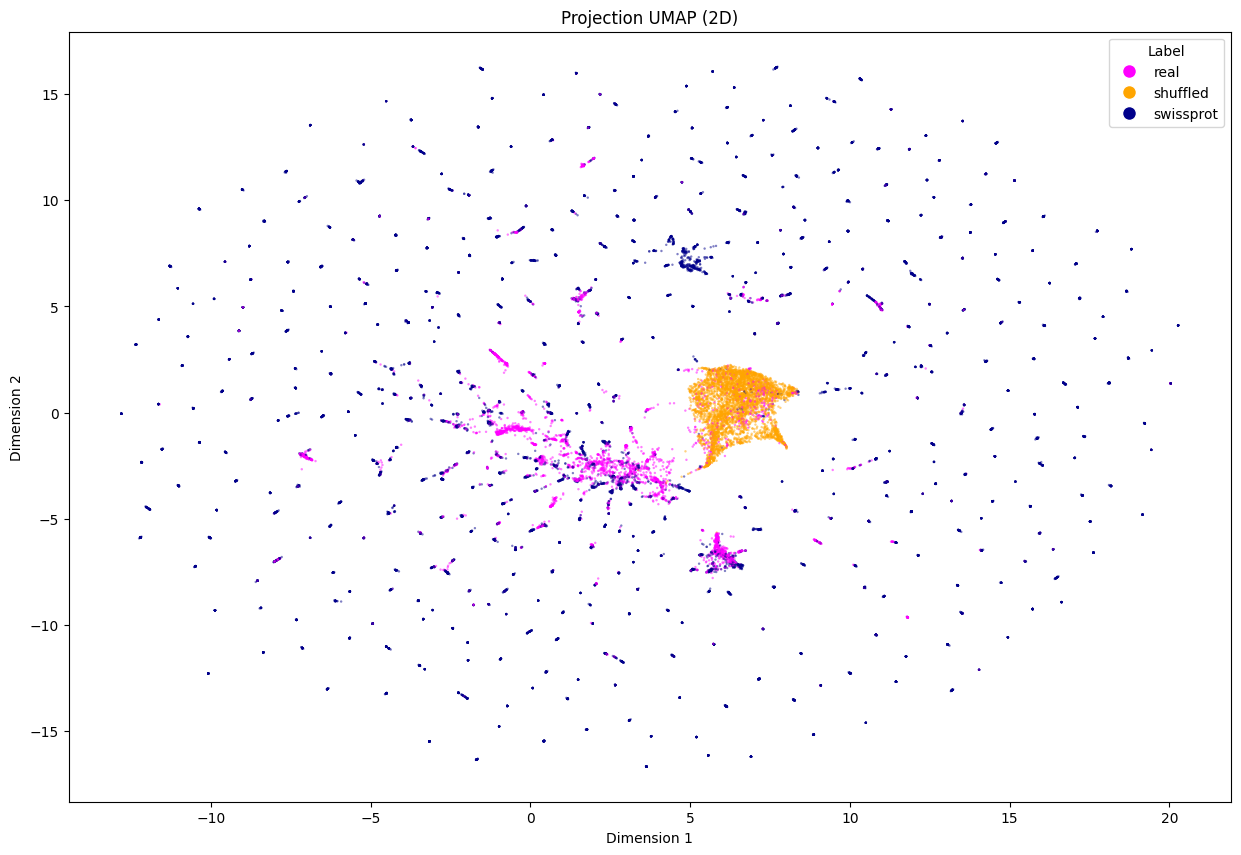

In [110]:
colors={"real": "magenta", "shuffled": "orange", "swissprot": "darkblue"}
alphas={"real":.5, "shuffled": .5, "swissprot":.5}

rng = np.random.default_rng(42)
idx = rng.permutation(len(y))

# color per point
colors_per_point = np.array([colors[label] for label in y])

alpha_per_point = np.array([alphas[label] for label in y])

plt.figure(figsize=(15,10))
plt.scatter(
    X_umap_2d[idx, 0],
    X_umap_2d[idx, 1],
    c=colors_per_point[idx],
    s=3,
    alpha=alpha_per_point[idx],
    linewidths=0,
    rasterized=True
)
from matplotlib.lines import Line2D
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
legend_handles = [
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor=colors[label], markersize=10, alpha=1.0, label=label)
    for label in sorted(np.unique(y))
]
plt.legend(handles=legend_handles, title="Label", loc='upper right', frameon=True)

plt.savefig('umap_swissprot.png', dpi=1600)
plt.show()

In [ ]:
### ANCIEN TEST
# Charger le jeu de données exemple
data_reel=np.array([[8,5,9,3,4], [8,9,7,6,8], [4,7,9,6,5], [7,4,8,9,6]])

data_shuffle=np.array([[6,7,2,1,2], [3,4,2,5,2], [2,5,4,3,4], [1,2,3,4,5]])

X = data_reel # Données d'entrée : vecteurs
X2 = data_shuffle

# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X2_standardized = scaler.fit_transform(X2)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)
X_umap_2d_2 = umap_2d.fit_transform(X2_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c="red")
plt.scatter(X_umap_2d_2[:, 0], X_umap_2d_2[:, 1], c="blue")
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()